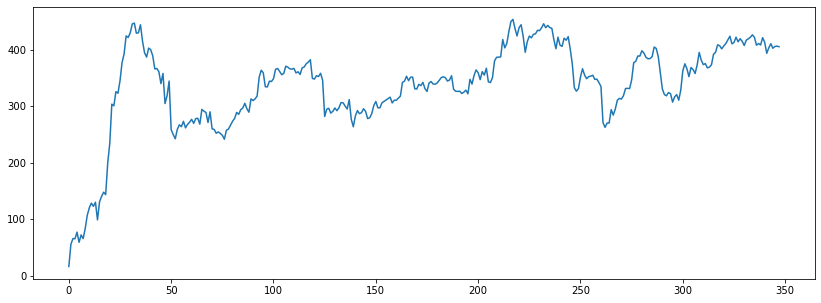

In [2]:
#get and graph data for tvl
import matplotlib.pyplot as plt

with open("eth-usdc-tvl.txt",'r') as f:
    contents = f.read()

contents = contents.replace('C ', '\n')

contents = contents.splitlines()
contents = contents[1:]

for i, e in enumerate(contents):
    contents[i] = 2.238829*(-float(e.split()[5]) + 265.763) + 16.2


x = [i for i in range(len(contents))]
y = contents

mini = 262.24

plt.figure(figsize=(14,5))
plt.plot(x, y)
plt.show()
tvl = contents


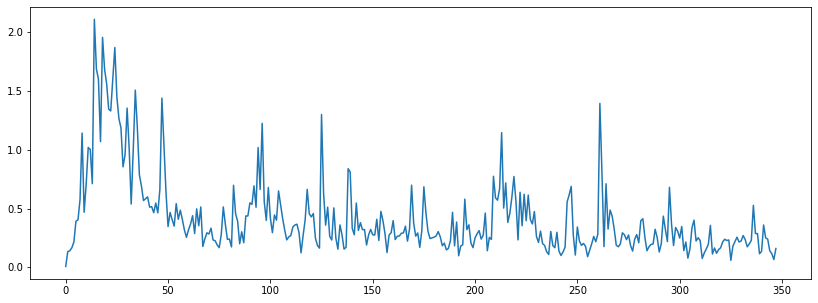

In [3]:
#get and grpah data for fees
with open('eth-usdc-fees.txt', 'r') as f:
    contents = f.read()
    
contents = contents.split()
fees = []
for e in contents:
    if e[:3] == 'hei':
        fees.append(((float(e[8:-1]) - 0.8350808001803784)*0.0082177786) + 0.00682)
fees = fees[1:]    

y = fees
x = [i for i in range(len(fees))]
plt.figure(figsize=(14,5))
plt.plot(x, y)
plt.show()

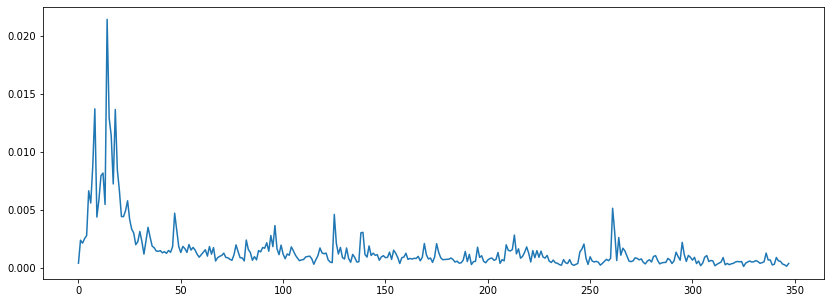

1.7461223001002224
1.3112118470432257
Approx. daily yield: 0.0007395086187624904
Approx. apy: 1.3097298449322374


In [95]:
#get pool yield
yld = []
for i, fee in enumerate(fees):
    yld.append(fee/tvl[i])
    
y = yld
x = [i for i in range(len(fees))]
plt.figure(figsize=(14,5))
plt.plot(x, y)
plt.show()

compounder = 1
for daily_yield in yld:
    compounder *= (daily_yield + 1)
    
print(compounder **(365/348))


days = 0
compounder = 1
for daily_yield in yld[250:]:
    days += 1
    compounder *= (daily_yield + 1)
    
print(compounder **(365/days))

last100 = yld[-100:]
avg_yld = sum(last100)/len(last100)

print('Approx. daily yield:', avg_yld)
print('Approx. apy:', (1+avg_yld)**365)


In [145]:
#impermanent loss function:

il = lambda x: (2*(x**.5)/(1+x))

il(200/100)

0.9428090415820635

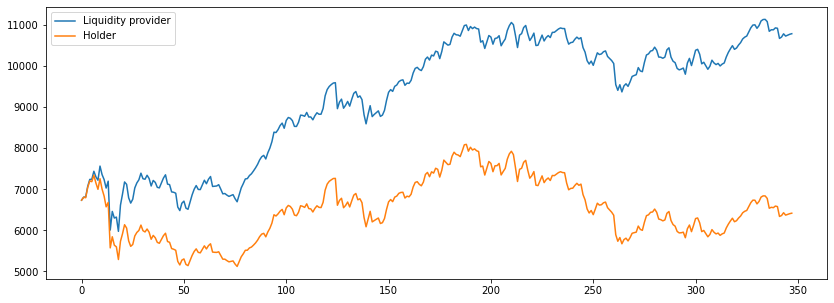

Liquidity Provider: 1.6388391787042296 Holder: 0.9506986774937286


1.0

In [144]:
#implement with impermanent loss




#get daily eth price; ethusd
with open('ETH-USD.csv') as f:
    contents = f.readlines()
contents = contents[1:]
ethusd = []
for e in contents:
    el = e.split(',')
    avg = (float(el[3]) + float(el[4]))/2  # avg of high + low
    ethusd.append(avg)
    

start_eth = ethusd[0]
start_dollars = ethusd[0]
portfolio_value = []

total_yield = 0
days = 0
pooled_value = []

for i, e in enumerate(ethusd):
    
    base_value = e + start_dollars
    
    il_value = base_value*il(e/start_eth) #divergence from initial investment
    
    pooled_value.append(il_value + total_yield) #keep adding on total yield
    
    total_yield += pooled_value[-1]*yld[i]
    
    days += 1


y = pooled_value
holder = [i + start_dollars for i in ethusd]
x = [i for i in range(len(fees))]
plt.figure(figsize=(14,5))
plt.plot(x, y)
plt.plot(x,holder)
plt.legend(['Liquidity provider', 'Holder'])
plt.show()

lp_return = (pooled_value[-1]/pooled_value[0])**(365/days)
hold_return = (holder[-1]/holder[0])**(365/days)

print('Liquidity Provider:', lp_return, 'Holder:', hold_return)

#curr_price/start_price = 1

il(1/1)

Apy against usd: 1.682198214343271
Apy against initial liquidity: 1.164417384597722


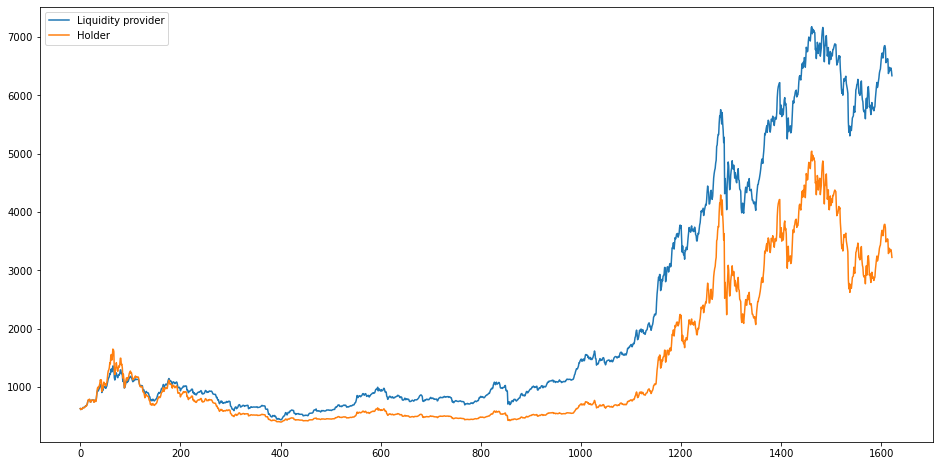

In [148]:
#get 5 yrs of data
with open('ETH-USD-5yr.csv') as f:
    contents = f.readlines()
contents = contents[1:]
ethusd = []
for e in contents:
    el = e.split(',')
    avg = (float(el[3]) + float(el[4]))/2  # avg of high + low
    ethusd.append(avg)

total_value = start_value = 2*ethusd[0] #starting value is 2 eth
start_dollars = start_eth = start_value/2

daily_yld = [] #yield earned each day
days = 0 #days in trial
lpv = [] #liquidity provider value



for i, e in enumerate(ethusd):
    
    #update number of days:
    days += 1
    #approximate daily yield:
    daily_yld.append(avg_yld * total_value)
    
    #set total yield to value of initial investment:
    total_value = (e + start_dollars)*il(e/start_eth)
    #calculate impermanent loss for each cost basis:
    for j, dy in enumerate(daily_yld):
        total_value += ((dy/2)*((e/ethusd[j]) + 1))*il(e/ethusd[j])
    lpv.append(total_value)
    
print('Apy against usd:',(total_value/start_value) ** (365/days))
print('Apy against initial liquidity:', (total_value/(ethusd[-1] + ethusd[0]))** (365/days))

x = [i for i in range(len(ethusd))]
hold = [e + (.5*start_value) for e in ethusd]


plt.figure(figsize=(16,8))
plt.plot(x, lpv)
plt.plot(x, hold)
plt.legend(['Liquidity provider', 'Holder'])
plt.show()